# Data preprocessing for Munich Solcast data
![1717068546-muenchen-skyline-2rZNQU9OvHea[1].jpg](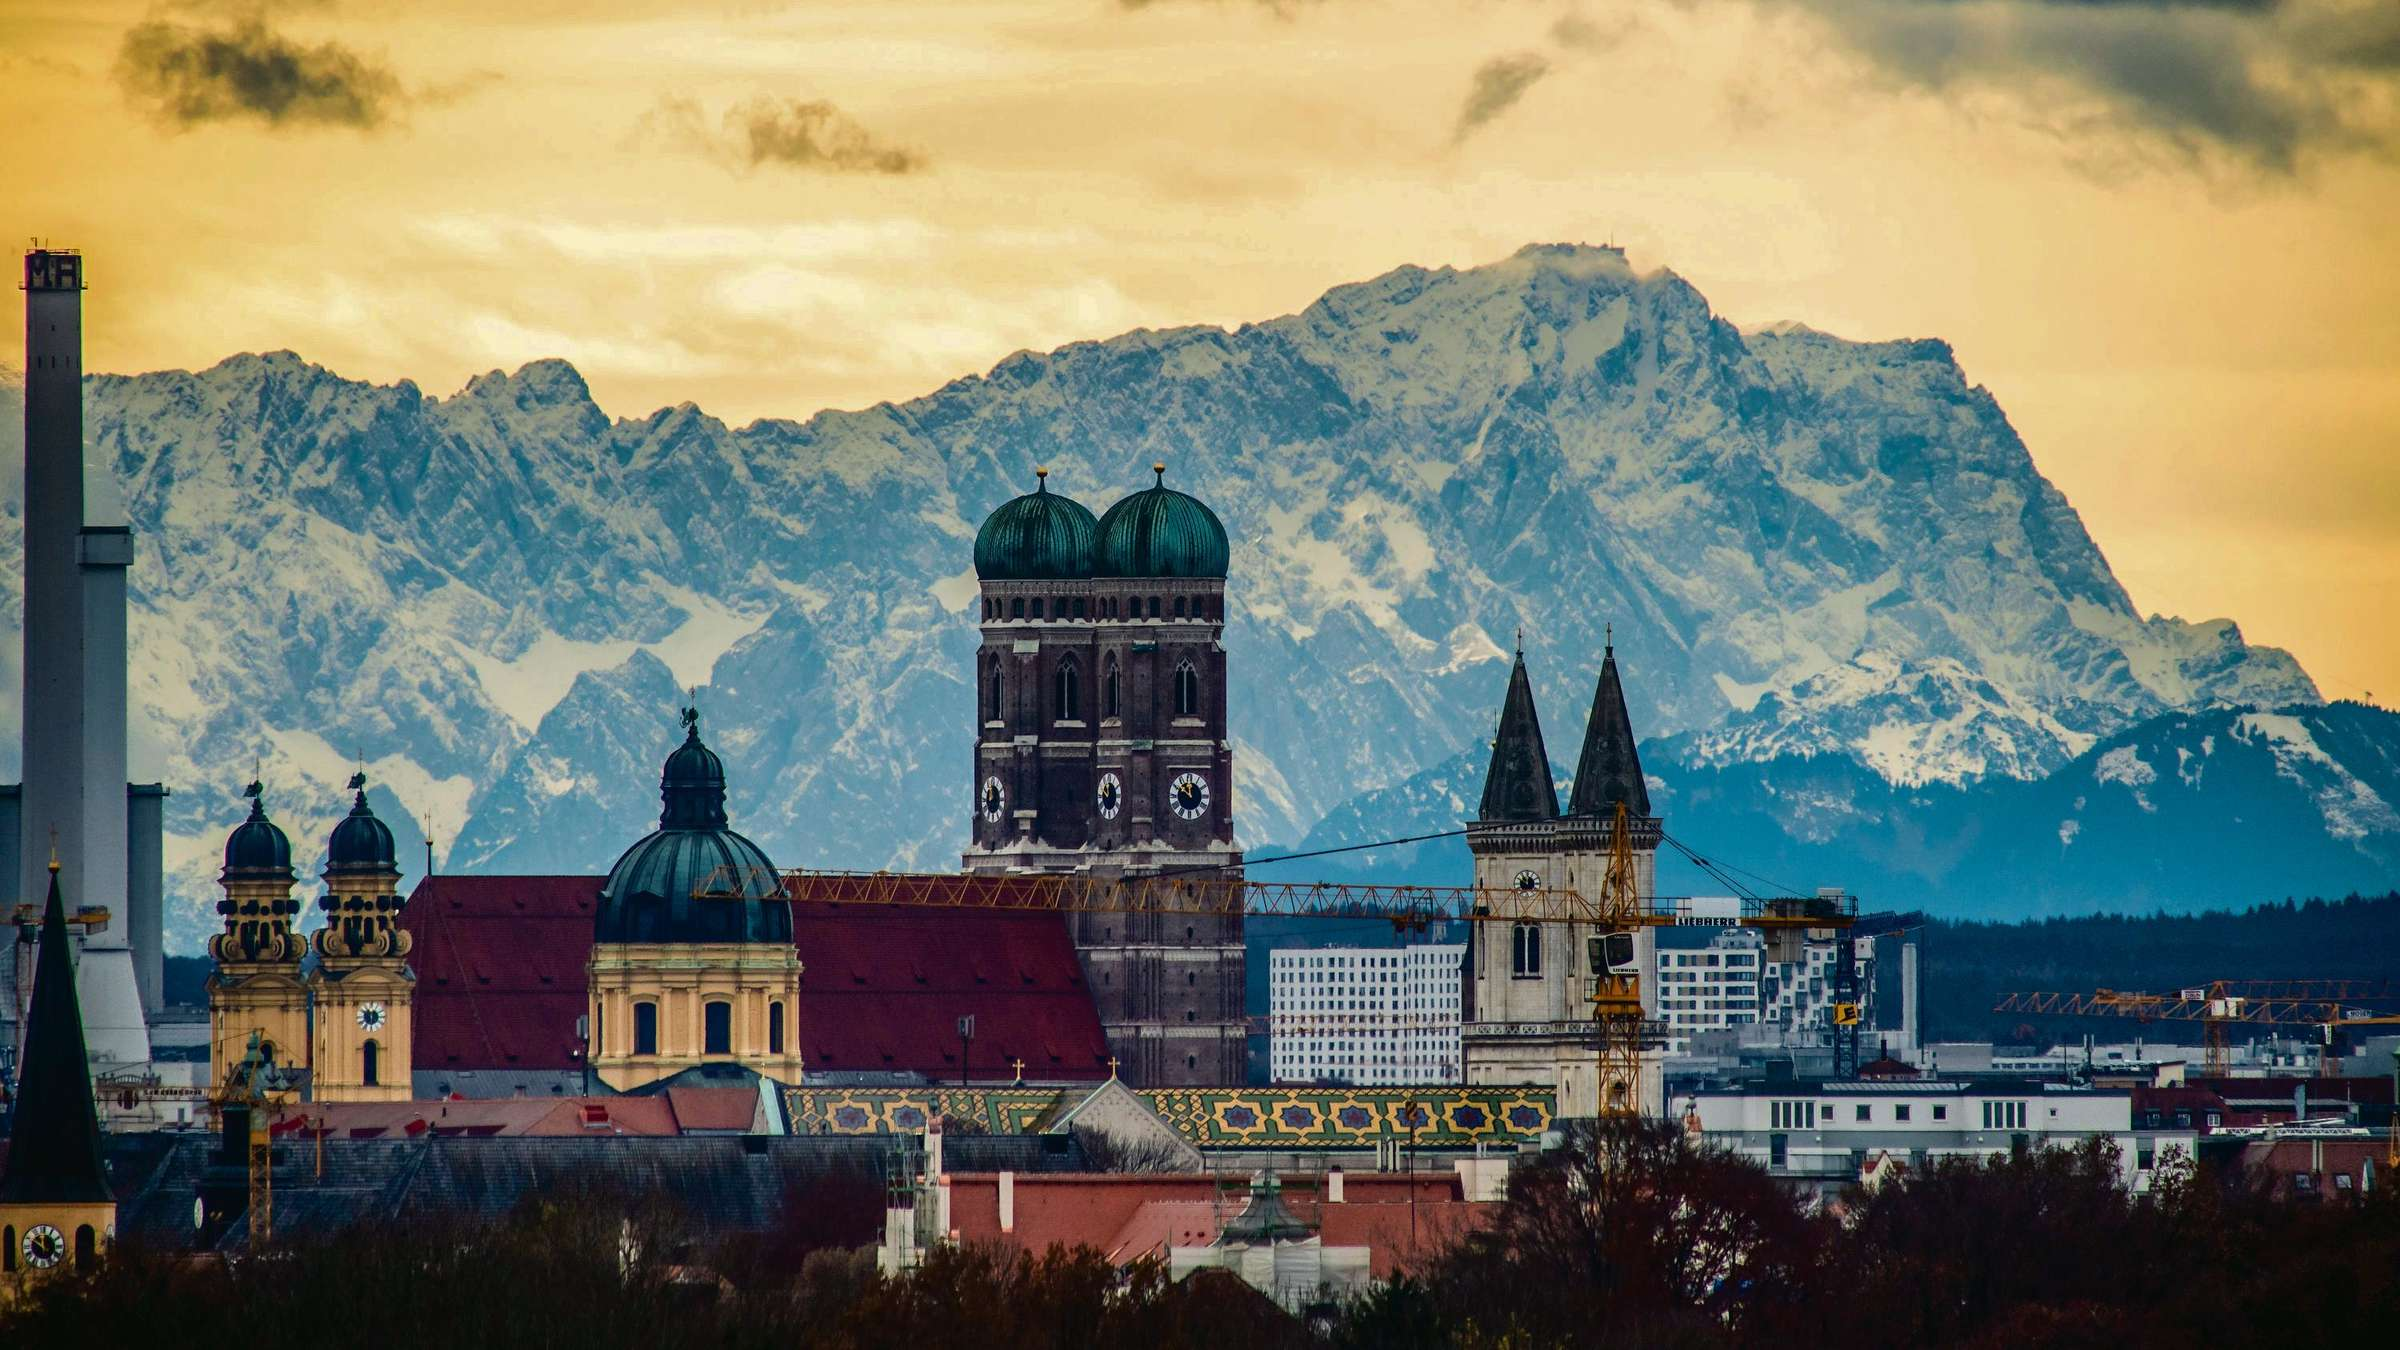)

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import os

In [2]:
data_path = os.path.join(os.getcwd(), 'data/Munich_Solcast_PT60M_raw.csv')
df = pd.read_csv(data_path)

In [3]:
df.head(5)

,PeriodEnd,PeriodStart,Period,AirTemp,CloudOpacity,Dhi,Dni,Ghi,PrecipitableWater,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m
0,2018-12-31T02:00:00Z,2018-12-31T01:00:00Z,PT60M,1.1,80.7,0,0,0,10.8,91.5,948.5,266,4.2
1,2018-12-31T03:00:00Z,2018-12-31T02:00:00Z,PT60M,0.5,82.2,0,0,0,11.0,91.3,948.5,266,4.0
2,2018-12-31T04:00:00Z,2018-12-31T03:00:00Z,PT60M,0.2,84.9,0,0,0,11.3,91.4,948.5,265,3.9
3,2018-12-31T05:00:00Z,2018-12-31T04:00:00Z,PT60M,0.1,92.7,0,0,0,11.6,91.7,948.4,264,3.9
4,2018-12-31T06:00:00Z,2018-12-31T05:00:00Z,PT60M,0.1,89.5,0,0,0,12.0,92.1,948.3,262,3.8


### Changing the names and types of the columns

In [4]:
# select some features
df = df[['PeriodEnd', 'PeriodStart', 'AirTemp', 'CloudOpacity', 'Dhi', 'Dni', 'Ghi', 'PrecipitableWater', 'RelativeHumidity', 'SurfacePressure', 'WindDirection10m', 'WindSpeed10m']]

In [5]:
old_names = ['PeriodEnd', 'PeriodStart', 'AirTemp', 'Dhi', 'Dni', 'Ghi','PrecipitableWater', 'RelativeHumidity',
             'SurfacePressure', 'WindDirection10m', 'WindSpeed10m'] 
new_names = ['PeriodEnd','PeriodStart','Temperature', 'DHI', 'DNI', 'Radiation', 'Precipitation', 'Humidity', 
             'Pressure', 'WindDirection', 'WindSpeed']
        
df.rename(columns = dict(zip(old_names, new_names)), inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
df.sample(5)

,PeriodEnd,PeriodStart,Temperature,CloudOpacity,DHI,DNI,Radiation,Precipitation,Humidity,Pressure,WindDirection,WindSpeed
21488,2021-06-13T10:00:00Z,2021-06-13T09:00:00Z,18.9,0.0,100,896,857,16.4,59.4,960.3,306,3.3
9390,2020-01-26T08:00:00Z,2020-01-26T07:00:00Z,0.5,10.7,29,0,29,10.9,81.9,952.3,218,1.4
4105,2019-06-20T03:00:00Z,2019-06-20T02:00:00Z,15.9,1.9,0,0,0,28.9,88.5,946.9,244,3.1
17834,2021-01-12T04:00:00Z,2021-01-12T03:00:00Z,-5.0,89.5,0,0,0,8.1,70.0,949.8,237,3.0
20318,2021-04-25T16:00:00Z,2021-04-25T15:00:00Z,13.3,0.0,77,788,427,8.0,41.7,954.1,1,3.5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25629 entries, 0 to 25628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PeriodEnd      25629 non-null  object 
 1   PeriodStart    25629 non-null  object 
 2   Temperature    25629 non-null  float64
 3   CloudOpacity   25629 non-null  float64
 4   DHI            25629 non-null  int64  
 5   DNI            25629 non-null  int64  
 6   Radiation      25629 non-null  int64  
 7   Precipitation  25629 non-null  float64
 8   Humidity       25629 non-null  float64
 9   Pressure       25629 non-null  float64
 10  WindDirection  25629 non-null  int64  
 11  WindSpeed      25629 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 2.3+ MB


In [8]:
 # cast data types to ensure compatibility
for col in ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection', 'WindSpeed']:
    df[col] = df[col].astype(float)

for col in ['PeriodStart', 'PeriodEnd']:
    df[col] = pd.to_datetime(df[col]).dt.to_period('T').dt.to_timestamp()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimes.py:1092: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25629 entries, 0 to 25628
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PeriodEnd      25629 non-null  datetime64[ns]
 1   PeriodStart    25629 non-null  datetime64[ns]
 2   Temperature    25629 non-null  float64       
 3   CloudOpacity   25629 non-null  float64       
 4   DHI            25629 non-null  int64         
 5   DNI            25629 non-null  int64         
 6   Radiation      25629 non-null  float64       
 7   Precipitation  25629 non-null  float64       
 8   Humidity       25629 non-null  float64       
 9   Pressure       25629 non-null  float64       
 10  WindDirection  25629 non-null  float64       
 11  WindSpeed      25629 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int64(2)
memory usage: 2.3 MB


### Applying correct time zone and winter/summer time

In [10]:
for col in ['PeriodStart', 'PeriodEnd']:
  df[col] = df[col].dt.tz_localize('UTC').dt.tz_convert('Europe/Berlin')

### Create sunrise and sunset feature

In [11]:
# Create new features(year, month, day) from start and end time of data collection  
df['Year'] = pd.to_datetime(df['PeriodEnd']).dt.year
df['Month'] = pd.to_datetime(df['PeriodEnd']).dt.month

df['HourPS'] = pd.to_datetime(df['PeriodStart']).dt.hour
df['HourPE'] = pd.to_datetime(df['PeriodEnd']).dt.hour

In [12]:
sorted(df.loc[df['Radiation'] == 0]['HourPS'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 19, 20, 21, 22, 23]

In [13]:
sorted(df.loc[df['Radiation'] == 0]['HourPE'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 17, 18, 19, 20, 21, 22, 23]

In [14]:
# create a new feature for sunrise using the function below; fill time for sunrise
def time_to_sunrise(row):
    """
    A function for identifying time of sunrise.
    """
    if (row['Radiation'] > 0) and (row['HourPS'] >= 3) and (row['HourPE'] <= 9):
      return row['HourPE']
    else:
      return 0

# create a new feature for sunset using the function below; fill time for sunset
def time_to_sunset(row):
    """
    A function for identifying time of sunrise.
    """
    if (row['Radiation'] > 0) and (row['HourPS'] >= 15) and (row['HourPE'] <= 23):
      return row['HourPE']
    else:
      return 0

In [15]:
#Create a new column using the function above
df['Sunrise'] = df.apply(time_to_sunrise, axis=1)

#Create a new column using the function above
df['Sunset'] = df.apply(time_to_sunset, axis=1)

In [16]:
sorted(df.Sunrise.unique()), sorted(df.Sunset.unique())

([0, 6, 7, 8, 9], [0, 16, 17, 18, 19, 20, 21, 22])

### Removing night time data

In [17]:
# filter night time rows
df = df.loc[~((df['Radiation'] == 0) & (df['DNI'] == 0) & (df['DHI'] == 0)),:]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13751 entries, 6 to 25622
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype                        
---  ------         --------------  -----                        
 0   PeriodEnd      13751 non-null  datetime64[ns, Europe/Berlin]
 1   PeriodStart    13751 non-null  datetime64[ns, Europe/Berlin]
 2   Temperature    13751 non-null  float64                      
 3   CloudOpacity   13751 non-null  float64                      
 4   DHI            13751 non-null  int64                        
 5   DNI            13751 non-null  int64                        
 6   Radiation      13751 non-null  float64                      
 7   Precipitation  13751 non-null  float64                      
 8   Humidity       13751 non-null  float64                      
 9   Pressure       13751 non-null  float64                      
 10  WindDirection  13751 non-null  float64                      
 11  WindSpeed      13751 non-nul

In [19]:
df.sample(5)

,PeriodEnd,PeriodStart,Temperature,CloudOpacity,DHI,DNI,Radiation,Precipitation,Humidity,Pressure,WindDirection,WindSpeed,Year,Month,HourPS,HourPE,Sunrise,Sunset
15372,2020-10-01 16:00:00+02:00,2020-10-01 15:00:00+02:00,18.0,0.0,101,727,459.0,16.5,57.4,939.5,311.0,1.9,2020,10,15,16,0,16
21661,2021-06-20 17:00:00+02:00,2021-06-20 16:00:00+02:00,26.1,20.6,367,85,426.0,35.4,55.8,946.0,51.0,3.8,2021,6,16,17,0,17
11796,2020-05-05 16:00:00+02:00,2020-05-05 15:00:00+02:00,10.1,68.5,231,0,231.0,14.3,68.4,950.2,247.0,1.3,2020,5,15,16,0,16
8893,2020-01-05 16:00:00+01:00,2020-01-05 15:00:00+01:00,3.1,9.1,50,268,81.0,7.8,78.9,965.8,263.0,1.2,2020,1,15,16,0,16
12016,2020-05-14 20:00:00+02:00,2020-05-14 19:00:00+02:00,10.5,36.1,71,0,71.0,18.3,78.7,946.0,81.0,3.7,2020,5,19,20,0,20


### Daywise aggregation

In [20]:
df['date'] = pd.to_datetime(df['PeriodEnd']).dt.normalize()

for col in ['Sunrise', 'Sunset']:
    df[col] = df[col].astype(str)
    
agg_dict = {
    'Temperature':'mean',
    'CloudOpacity':'mean',
    'DHI':'mean',
    'DNI':'mean',
    'Radiation':'mean',
    'Precipitation':'mean',
    'Humidity':'mean',
    'Pressure':'mean',
    'WindDirection':'mean',
    'WindSpeed':'mean',
    'Sunrise':'max',
    'Sunset':'max',
}

df_grouped = df.groupby(['date']).agg(agg_dict)
df_grouped.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [21]:
df_grouped.sample(10)

,date,Temperature,CloudOpacity,DHI,DNI,Radiation,Precipitation,Humidity,Pressure,WindDirection,WindSpeed,Sunrise,Sunset
957,2021-08-14 00:00:00+02:00,24.653333,4.626667,111.000000,502.066667,438.200000,33.020000,71.020000,956.966667,257.333333,1.166667,9,21
37,2019-02-06 00:00:00+01:00,-2.081818,19.209091,111.090909,313.181818,197.363636,4.390909,68.363636,941.081818,152.636364,1.572727,9,18
63,2019-03-04 00:00:00+01:00,7.818182,46.554545,81.909091,246.454545,191.454545,9.281818,57.863636,919.418182,237.363636,5.509091,9,18
93,2019-04-03 00:00:00+02:00,11.984615,27.430769,175.230769,270.000000,344.000000,12.692308,57.761538,919.507692,174.615385,2.746154,9,20
232,2019-08-20 00:00:00+02:00,16.892857,73.378571,102.071429,0.000000,102.071429,35.150000,93.771429,953.535714,227.571429,1.764286,9,20
652,2020-10-13 00:00:00+02:00,7.091667,56.883333,104.500000,19.416667,107.666667,10.133333,80.991667,945.525000,157.250000,1.383333,9,19
501,2020-05-15 00:00:00+02:00,7.046667,66.193333,152.466667,0.000000,152.466667,15.786667,84.806667,949.466667,96.666667,2.546667,9,21
951,2021-08-08 00:00:00+02:00,13.786667,62.973333,165.000000,0.000000,165.000000,23.160000,92.240000,951.513333,221.133333,2.280000,9,21
987,2021-09-13 00:00:00+02:00,18.935714,18.742857,175.142857,262.642857,308.928571,21.957143,75.114286,953.392857,85.214286,1.535714,9,20
765,2021-02-03 00:00:00+01:00,8.033333,73.988889,58.666667,0.000000,58.666667,18.655556,85.455556,939.622222,191.777778,2.155556,9,17


In [22]:
df_grouped['Sunrise'] = df_grouped['Sunrise'].astype(int) 
df_grouped['Sunset'] = df_grouped['Sunset'].astype(int) 
df_grouped['Month'] = pd.to_datetime(df_grouped['date']).dt.month

### Export clean data 

In [23]:
# drop irrelevant features
df_grouped= df_grouped.drop([ 'Sunrise', 'Sunset'], axis= 1)

In [24]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype                        
---  ------         --------------  -----                        
 0   date           1068 non-null   datetime64[ns, Europe/Berlin]
 1   Temperature    1068 non-null   float64                      
 2   CloudOpacity   1068 non-null   float64                      
 3   DHI            1068 non-null   float64                      
 4   DNI            1068 non-null   float64                      
 5   Radiation      1068 non-null   float64                      
 6   Precipitation  1068 non-null   float64                      
 7   Humidity       1068 non-null   float64                      
 8   Pressure       1068 non-null   float64                      
 9   WindDirection  1068 non-null   float64                      
 10  WindSpeed      1068 non-null   float64                      
 11  Month          1068 non-null  

In [25]:
export_path = os.path.join(os.getcwd(), 'data/Munich_Solcast_PT60M_clean.csv')
df_grouped.to_csv(export_path, index=False)